In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import image_dataset_from_directory,to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_dataset(dir,img_size=(32,32)):
    data=image_dataset_from_directory(dir,image_size=img_size)
    image,label=[],[]
    for x,y in data:
        image.append(x.numpy())
        label.append(y.numpy())
    X=np.concatenate(image)
    Y=np.concatenate(label)
    Y=to_categorical(Y,10)
    return X,Y


In [ ]:
X,Y=load_dataset("D:\\Source_code\\Lab\\data\\cifar10\\train")

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)


Found 50000 files belonging to 10 classes.


c:\Program Files\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:

model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512,activation='relu'),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
log=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2385 - loss: 15.1223 - val_accuracy: 0.3085 - val_loss: 2.0042
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.3215 - loss: 1.9580 - val_accuracy: 0.3156 - val_loss: 1.9881
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.3322 - loss: 1.9049 - val_accuracy: 0.3364 - val_loss: 1.8603
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.3433 - loss: 1.8592 - val_accuracy: 0.3573 - val_loss: 1.7986
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.3482 - loss: 1.8288 - val_accuracy: 0.3270 - val_loss: 1.8402


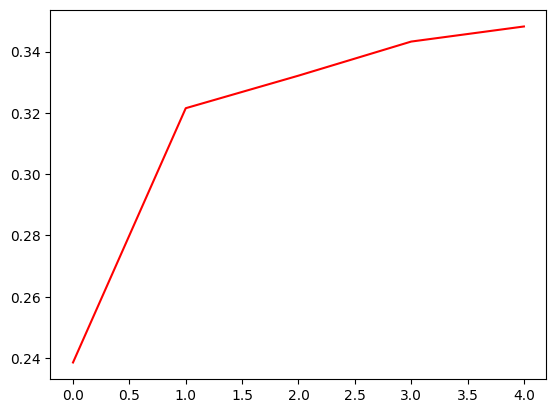

In [15]:

plt.plot(log.history['accuracy'],color='red',label='accuracy')
plt.show()